# Moving Average Indicator

Extremely easy approach, (not miss-confuse with the moving average time series related model which is a bit more complicated).

Indicator:
- First used back in 1901,
- One of the most popular technical indicator,
- Arithmetic mean of a given asset price over specific number of days in the past,
- Calculate the moving avg of a stock helps to smooth out the price data.



$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$


### Long time periods (slow SMA)
- popular times are 50, 100 and 200,
- Less sensitive as price changes,
- used for long term positions.


### Short time periods (fast sma)
- popular times are 15, 20 and 30,
- more sensitive to price changes so no that smooth,
- used mostly for short term positions.

#### Example
- green series: short time sma
- blue series: long time sma

![alt text](assets/sma1.png)

In [1]:
# libraries 
import yfinance as yf 
import pandas as pd

# method
def download_data(stock: str, start_date: str, end_date: str) -> pd.DataFrame:
    # Download data using yfinance
    ticker = yf.download(stock, start=start_date, end=end_date)
    
    # Print the keys of the downloaded data (for debugging)
    #rint(ticker.keys())
    
    # Create a dictionary with the required data
    data = {
        'Price': [item[0] for item in ticker['Close'].values],  # Use the 'Close' column for prices
        'Timestamp': ticker.index  # Use the index (dates) as the timestamp
    }
    # Convert the dictionary to a DataFrame
    res_df = pd.DataFrame(data)
    
    # Set the 'Timestamp' column as the index
    res_df.set_index('Timestamp', inplace=True)
    
    return res_df

# Testing the function
start = '2010-01-05'
end = '2025-01-26'

stock_data = download_data('NVDA', start, end)
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                 Price
Timestamp             
2010-01-05    0.430113
2010-01-06    0.432864
2010-01-07    0.424381
2010-01-08    0.425298
2010-01-11    0.419337
...                ...
2025-01-17  137.710007
2025-01-21  140.830002
2025-01-22  147.070007
2025-01-23  147.220001
2025-01-24  142.619995

[3788 rows x 1 columns]


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('darkgrid')

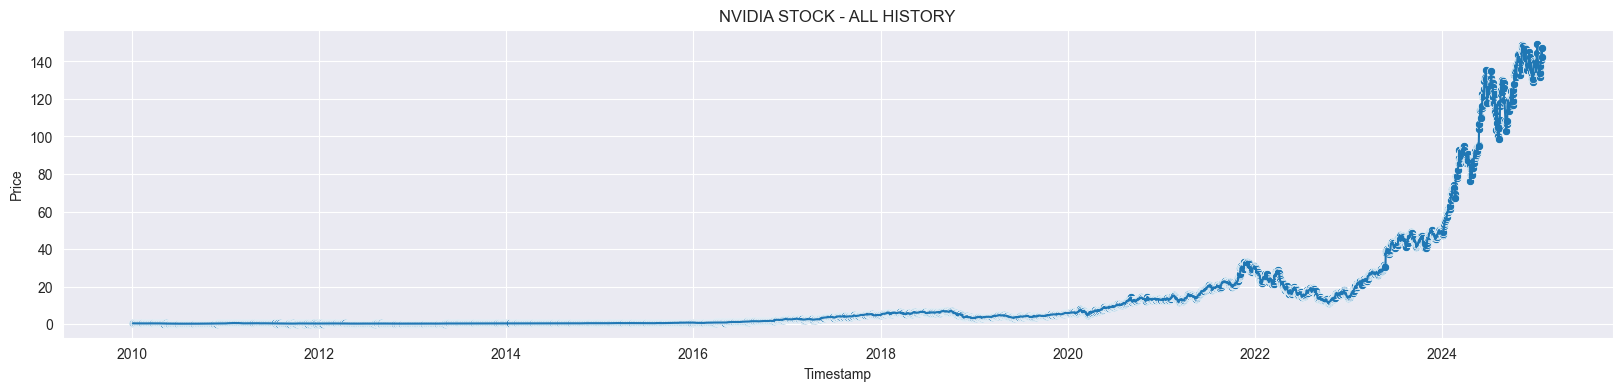

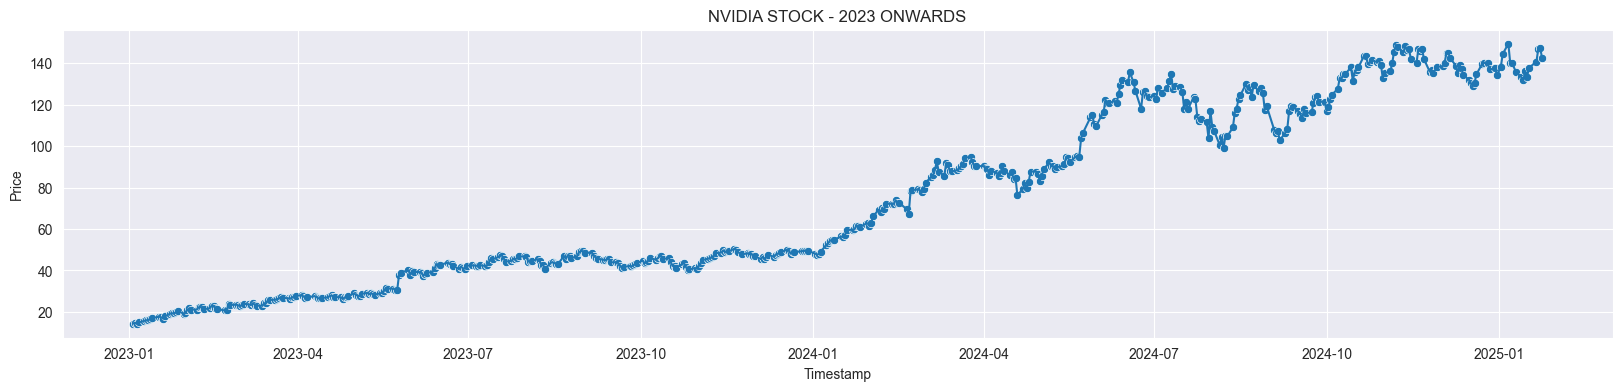

In [3]:
plt.figure(figsize=(20,4))
sns.lineplot(data=stock_data, x='Timestamp', y='Price')
sns.scatterplot(data=stock_data, x='Timestamp', y='Price')
plt.title('NVIDIA STOCK - ALL HISTORY')
plt.show()

plt.figure(figsize=(20,4))
sns.lineplot(data=stock_data['2023-01-01':], x='Timestamp', y='Price')
sns.scatterplot(data=stock_data['2023-01-01':], x='Timestamp', y='Price')
plt.title('NVIDIA STOCK - 2023 ONWARDS')
plt.show()

## SMA and Resistance Levels (algorithmic trading)

most common application of SMA (single moving avg):
- determine trend direction,
- when the S(t) price crosses their moving averages - these are usually trading signals.


#### Support level

* <b>During a bullish market, the SMAs can define the support levels. Are price levels that an asset does not fall bellow for some period of time.</b>
* we can detect these resistance levels with short as well as with fast period moving averages.

![alt text](assets/sma2.png)


#### Resistance level

* <b>During a bearish market, the SMAs can define the support levels. Are price levels that an asset does not go beyond for some period of time.</b>
* we can detect these resistance levels with short as well as with fast period moving averages.

![alt text](assets/sma3.png)


C:\Users\pops\AppData\Local\Temp\ipykernel_15452\3703184273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short SMA'] = data['Price'].rolling(window=short_period).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_15452\3703184273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long SMA'] = data['Price'].rolling(window=long_period).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_15452\3703184273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

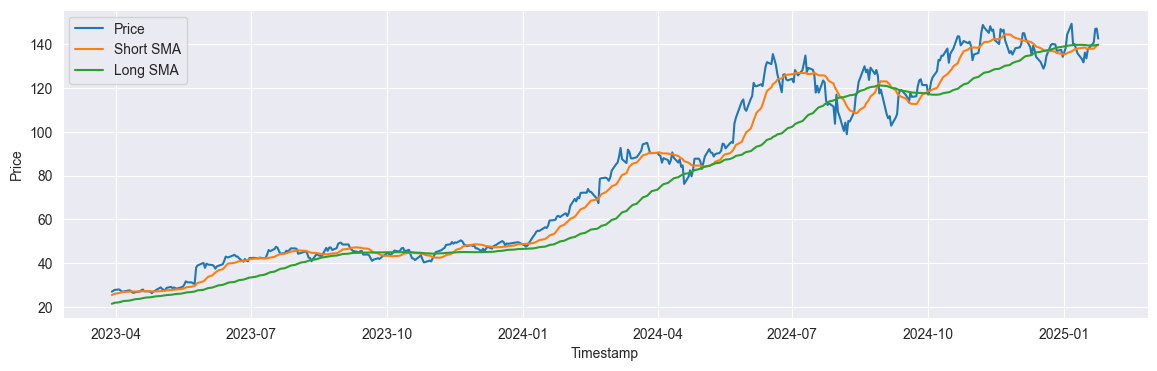

In [4]:
def construct_sma(data:pd.DataFrame, short_period:str, long_period:str, since_date:str):
    data.dropna(inplace=True)
    if since_date:
        data = data[since_date:]
    data['Short SMA'] = data['Price'].rolling(window=short_period).mean()
    data['Long SMA'] = data['Price'].rolling(window=long_period).mean()

    data.dropna(inplace=True)
    return data

def plot_data(data:pd.DataFrame):
    plt.figure(figsize=(14,4))
    for col in data.columns:
        sns.lineplot(data=data, x='Timestamp', y=col, label=col)
    plt.show()
    return 

# testing the function
data_ = construct_sma(stock_data, 15, 60, since_date='2023-01-01').copy()
plot_data(data_)

### Exponential Moving Average (EMA) Indicator

- it is similar to simple moving average indicator but here we introduce weighthing factos that decrease exponentially

Simple SMA is the unweighted mean of the previous S(t) stock prices. Using EMA we're dealing with exponentially weighted stock prices
- So, recent stock prices are more important in this model


$$
EMA_t = \alpha \cdot Price_t + (1 - \alpha) \cdot EMA_{t-1}
$$


The exponential moving avg is the weighted mean of the previous S(t) stock prices. The 'a' symbol represents the degree of decrease

C:\Users\pops\AppData\Local\Temp\ipykernel_15452\832198791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short EMA'] = data['Price'].ewm(span=short_period, adjust=False).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_15452\832198791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long EMA'] = data['Price'].ewm(span=long_period, adjust=False).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_15452\832198791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

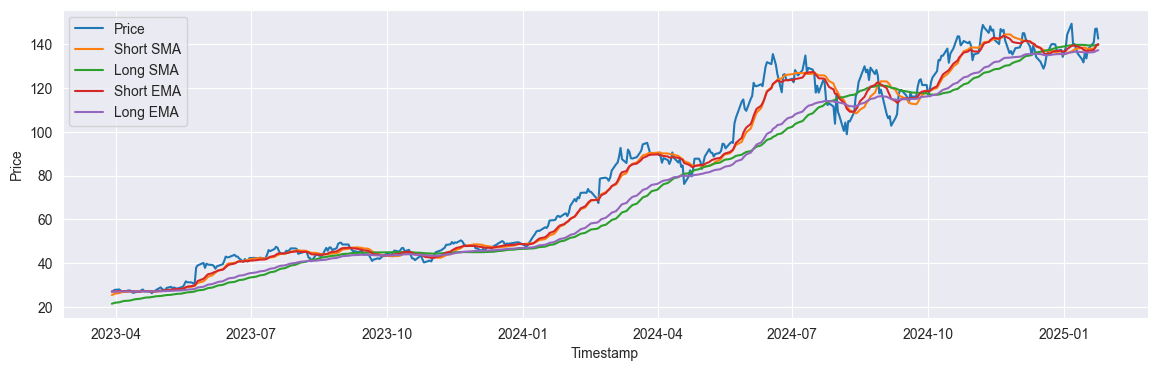

In [5]:
def construct_ema(data:pd.DataFrame, short_period:str, long_period:str, since_date:str):
    data.dropna(inplace=True)
    if since_date:
        data = data[since_date:]
    data['Short EMA'] = data['Price'].ewm(span=short_period, adjust=False).mean()
    data['Long EMA'] = data['Price'].ewm(span=long_period, adjust=False).mean()
    
    data.dropna(inplace=True)
    return data

data_ = construct_ema(data_, 15, 60, since_date='2023-01-01')

plot_data(data_)


### Moving Average Crossover Strategy: I



<h3> Long position strategy: Signals of bullish market </h3>

- When short SMA crosses upward the long SMA, it is a symbol that a potential bullish market is going to happen. This is called <b> the golden cross. </b>

![alt text](assets/sma_strat1.png)


- Once the smoothed signals crossed the other way around again, it is a signal of a bearish market. This is called <b> the death cross. </b>

![alt text](assets/sma_strat2.png)

In [6]:
# Strategy implementation

import yfinance as yf 
import pandas as pd


class MovingAverageCrossover:

    def __init__(self, capital, stock, start, end, short_period, long_period):
        self.data = None
        self.is_long = False
        self.short_period = short_period
        self.long_period = long_period
        self.capital = capital
        self.equity = [capital] # pss, Equity is shares/stocks of a company, also is used for companies worth measurement (Equity = Assets - Liabilities)

        self.stock = stock 
        self.start = start
        self.end = end
        self.trading_dates = []



    def download_data(self) -> pd.DataFrame:
        # Download data using yfinance
        ticker = yf.download(self.stock, self.start, self.end)
        
        # Create a dictionary with the required data
        data = {
            'Price': [item[0] for item in ticker['Close'].values],  # Use the 'Close' column for prices
            'Timestamp': ticker.index  # Use the index (dates) as the timestamp
        }
        # Convert the dictionary to a DataFrame
        res_df = pd.DataFrame(data)
        
        # Set the 'Timestamp' column as the index
        res_df.set_index('Timestamp', inplace=True)

        self.data = res_df
        
        return
    

    def construct_signals(self):
        self.data['short_ma'] = self.data['Price'].ewm(span=self.short_period).mean()
        self.data['long_ma'] = self.data['Price'].ewm(span=self.long_period).mean()
        return 
    
    def plot_signals(self, plot_trading_dates=False):
        sns.set_style('darkgrid')
        sns.set_palette('tab10')
        plt.figure(figsize=(16,4))
        sns.lineplot(data=self.data, x='Timestamp', y='Price', label='stock price')
        sns.lineplot(data=self.data, x='Timestamp', y='short_ma', label=f'short_ma: {self.short_period}')
        sns.lineplot(data=self.data, x='Timestamp', y='long_ma', label=f'long_ma: {self.long_period}')

        if plot_trading_dates:
            y_min, y_max = plt.ylim()
            text_y_position = y_max + (y_max - y_min) * -0.1  # Place text slightly above the plot


            # Process trades by type
            buy_dates = [trade['date'] for trade in self.trading_dates if trade['type'] == 'BUY']
            sell_dates = [trade['date'] for trade in self.trading_dates if trade['type'] == 'SELL']
            # Plot buy signals
            for date in buy_dates:
                plt.axvline(x=date, color='green', alpha=0.5, linestyle='--', 
                            label='Buy' if date == buy_dates[0] else None)
                plt.text(date, text_y_position, 'BUY', rotation=90, 
                    color='green', alpha=0.8, ha='left', va='bottom')
                
            # Plot sell signals
            for date in sell_dates:
                plt.axvline(x=date, color='red', alpha=0.5, linestyle='--',
                            label='Sell' if len(sell_dates) > 0 and date == sell_dates[0] else None)
                plt.text(date, text_y_position, 'SELL', rotation=90,
                            color='red', alpha=0.8, ha='left', va='bottom')

        plt.title(f'Moving Average Crossover Trading Strategy - Stock: {self.stock}')
        plt.show()
        return
    

    def simulate(self):
        # we considere all the trading days and decide to wheter open a long position or not
        price_when_buy = 0
        

        for index, row in self.data.iterrows():
            trading_dict = {}
            # close the long position we have opened
            if row['short_ma'] < row['long_ma'] and self.is_long:
                # death cross 
                self.equity.append(self.capital * row.Price / price_when_buy)
                self.is_long = False
                trading_dict['type'] = 'SELL'
                trading_dict['date'] = index
                self.trading_dates.append(trading_dict)
                #print('SELL')

            elif row['short_ma'] > row['long_ma'] and not self.is_long:
                # golden cross
                # OPEN LONG POSITION
                price_when_buy = row['Price']
                self.is_long = True
                trading_dict['type'] = 'BUY'
                trading_dict['date'] = index
                self.trading_dates.append(trading_dict)
                #print('BUY')


    def plot_equity(self):
        """
        Plot the equity curve and display trading performance metrics.
        
        Returns:
            None: Displays a plot and prints performance statistics
        """
        initial_equity = float(self.equity[0])
        final_equity = float(self.equity[-1])
        
        # Calculate profit percentage
        profit_percentage = ((final_equity - initial_equity) / initial_equity) * 100
        
        # Format output with f-strings for better readability
        print(f"Profit of the trading strategy: {profit_percentage:.2f}%")
        print(f"Actual capital: ${final_equity:.2f}")
        
        # Create figure with specified dimensions
        plt.figure(figsize=(12, 4))
        sns.lineplot(self.equity, label='stock price', color='green')
        sns.scatterplot(self.equity, label='stock price', color='green')
        plt.axhline(y=self.capital, label=f'initial capital: {self.capital}', alpha=0.7, color='gray', linestyle='--')
        plt.legend()
        plt.show()
        return 
            


Stock = HON


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: -4.90%
Actual capital: $95.10


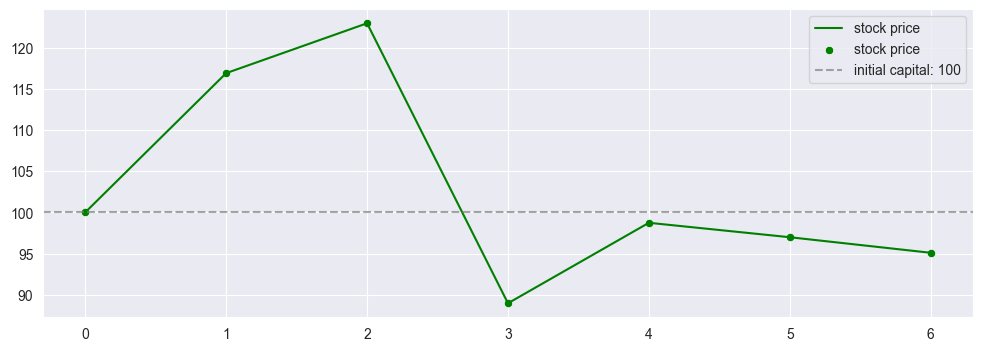

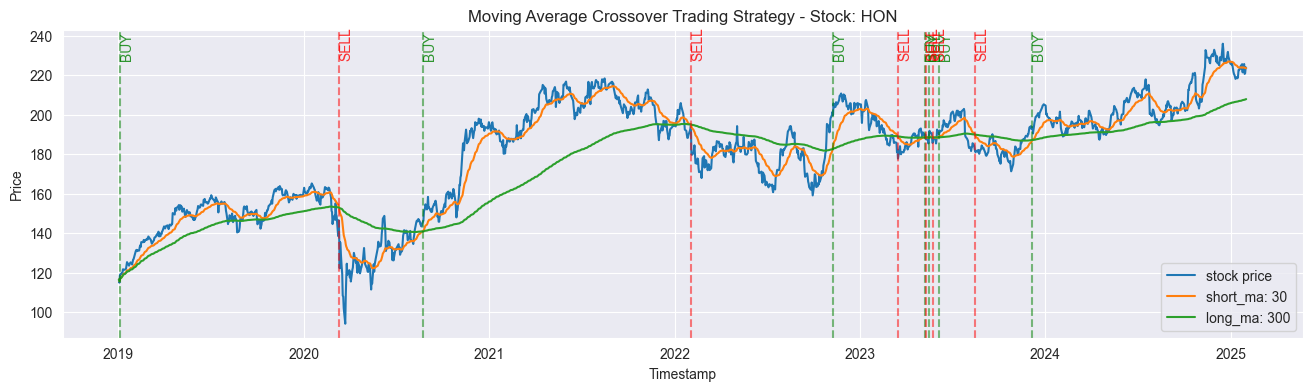

[{'type': 'BUY', 'date': Timestamp('2019-01-04 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-03-11 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-08-24 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-02-03 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-11-09 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-03-17 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-05-09 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-05-12 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-05-18 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-05-25 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-06-05 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-08-16 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-12-07 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = AAPL


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: 12.93%
Actual capital: $112.93


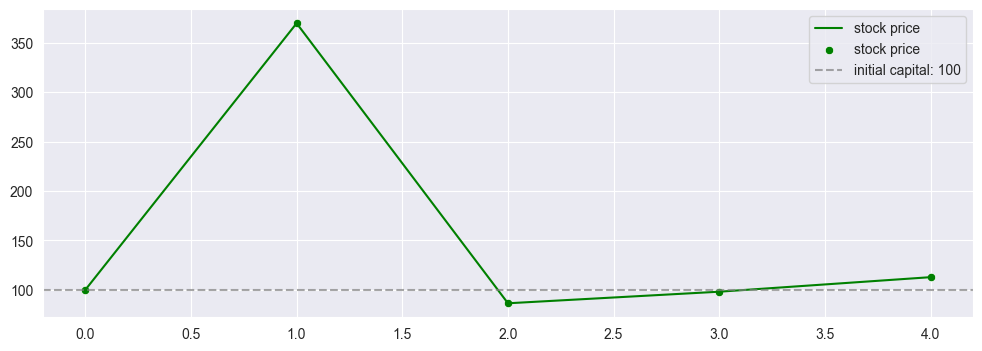

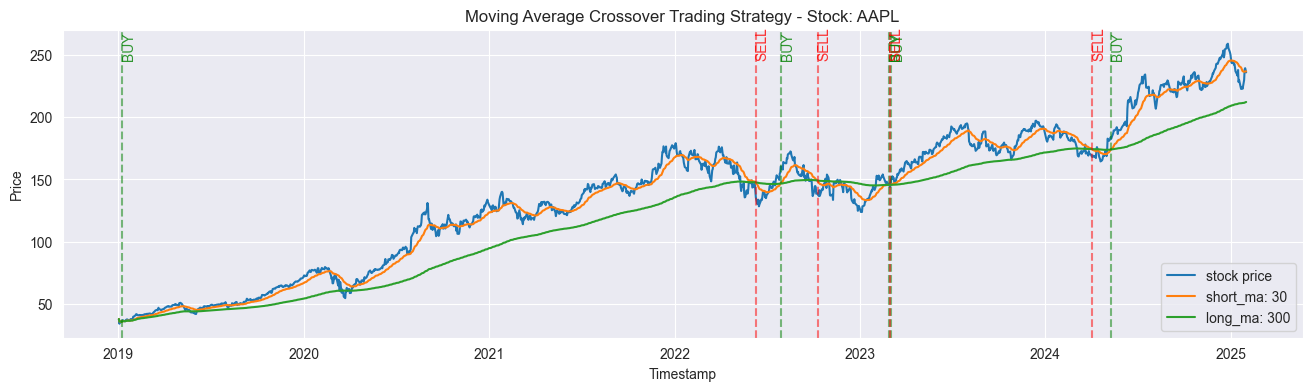

[{'type': 'BUY', 'date': Timestamp('2019-01-09 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-06-10 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-07-29 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-10-10 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-02-27 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-03-01 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-03-03 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2024-04-03 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2024-05-10 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = NVDA


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: 341.51%
Actual capital: $441.51


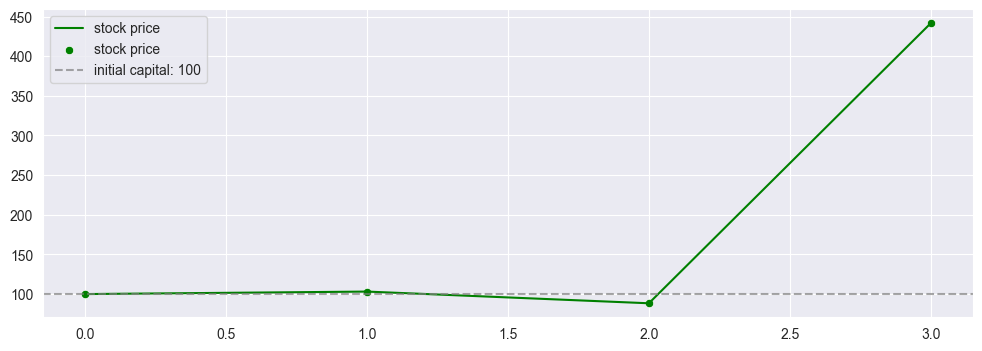

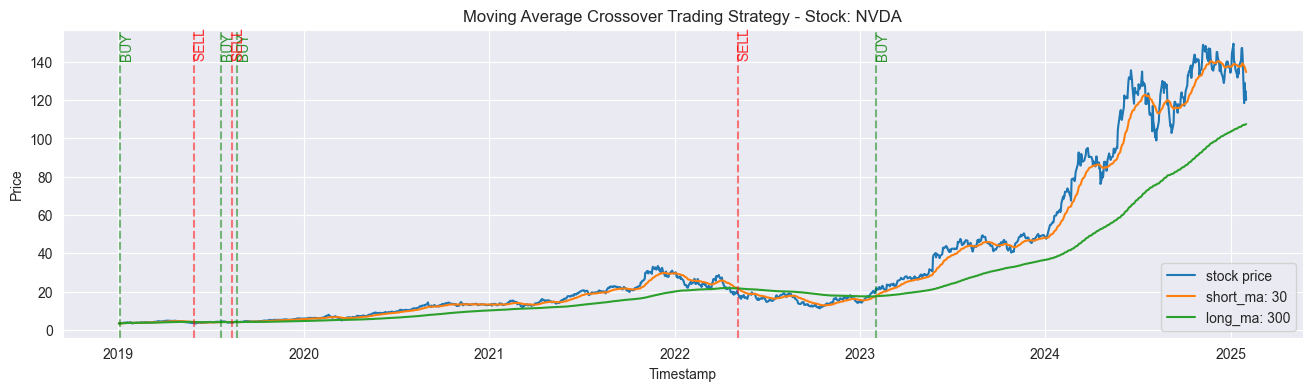

[{'type': 'BUY', 'date': Timestamp('2019-01-04 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-05-29 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-07-22 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-08-12 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-08-22 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-05-05 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-02-01 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = TSLA


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: -13.29%
Actual capital: $86.71


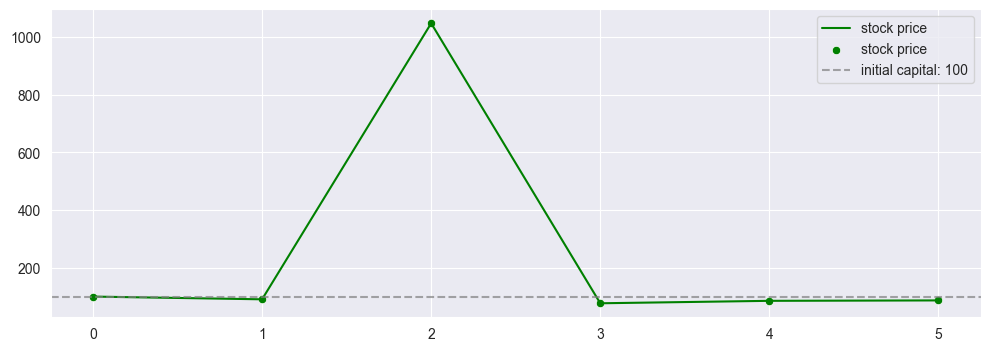

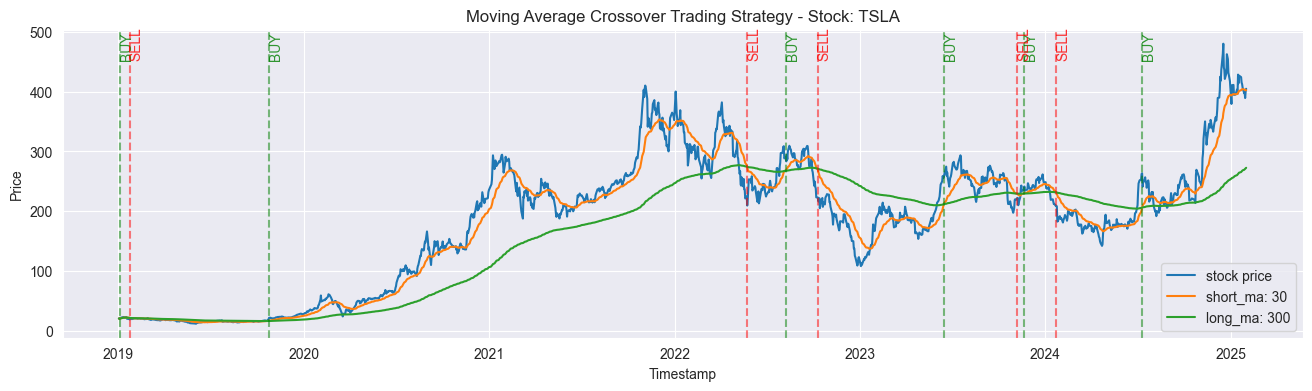

[{'type': 'BUY', 'date': Timestamp('2019-01-04 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-01-23 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-10-24 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-05-24 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-08-08 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-10-10 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-06-16 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-11-07 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-11-21 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2024-01-23 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2024-07-10 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = BTC-USD


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: -7.64%
Actual capital: $92.36


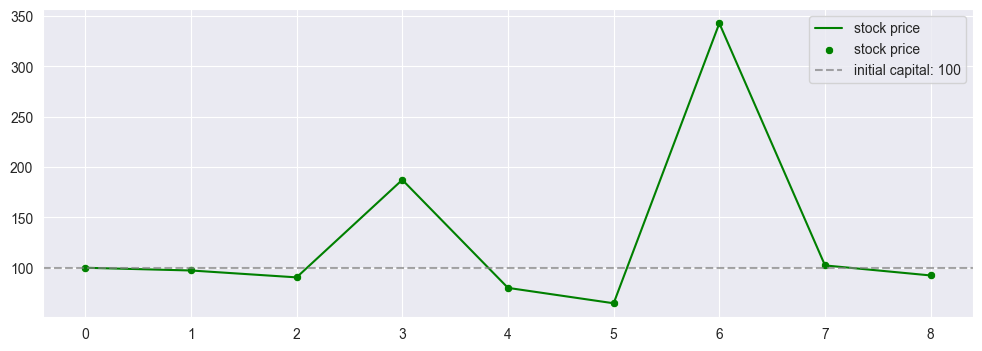

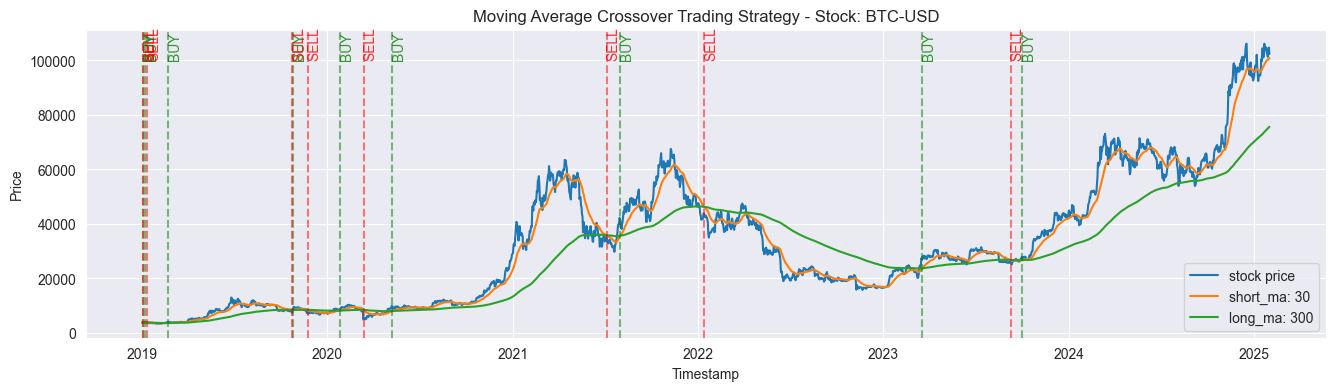

[{'type': 'BUY', 'date': Timestamp('2019-01-02 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-01-03 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-01-06 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-01-11 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-02-20 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-10-24 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-10-26 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-11-23 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-01-26 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-03-13 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-05-08 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2021-07-05 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2021-07-31 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-01-13 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-03-19 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-09-09 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-10-02 0

In [7]:
if __name__ == '__main__':

    import datetime

    stock_list:list = ['HON', 'AAPL', 'NVDA', 'TSLA', 'BTC-USD']
    short_period:int = 30 # days
    long_period:int = 300 # days 

    for stock in stock_list:
        print(f'Stock = {stock}')
        
        start_date = datetime.datetime(2019, 1, 1)
        end_date = datetime.datetime(2025, 2, 1)
        strategy = MovingAverageCrossover(100, stock, start_date, end_date, 30,300)

        strategy.download_data()
        strategy.construct_signals()
        strategy.simulate()
        strategy.plot_equity()
        strategy.plot_signals(plot_trading_dates=True)


        print(strategy.trading_dates)
        print('*'*200)
        print("\n")


## Relative Strength Indicator (Algorithmic trading)

- It is a momentum oscillator that measures the speed and change price movements.

# Understanding RSI (Relative Strength Index) and Overbought/Oversold Conditions

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and magnitude of price movements. Developed by J. Welles Wilder in 1978, RSI provides vital information about market conditions that simple trend indicators like Moving Averages cannot capture. While Moving Averages show the direction of a trend, RSI indicates the strength of price movements and helps identify potentially unsustainable price conditions.

RSI operates on a scale of 0 to 100, with readings above 70 typically considered "overbought" and below 30 considered "oversold". These conditions occur when price movements become unsustainable in either direction. An overbought condition suggests that buyers have been pushing the price up too aggressively in a short period, potentially leading to a price correction. Conversely, an oversold condition indicates that sellers have been too aggressive, potentially leading to a price bounce. However, it's crucial to note that overbought/oversold signals should not be used in isolation - they are most effective when combined with other technical indicators and overall market context, particularly during strong trends where prices can remain in overbought/oversold territories for extended periods.

To better understand RSI, consider it as a speedometer for price movements. Just as a car can't sustain redline speeds indefinitely, a stock's price usually can't maintain an extremely rapid rise or fall. For example, if a stock typically trades around $100 and suddenly shoots up to $120 in just a few days due to intense buying pressure, the RSI might show a reading above 70, suggesting this pace is unsustainable - like a car in the red zone of its tachometer. Another helpful analogy is physical exercise: normal activity (RSI between 30-70) is healthy and sustainable, overtraining (RSI > 70) leads to exhaustion and needed rest, while complete inactivity (RSI < 30) suggests room for increased activity. A real-world example occurred during the March 2020 COVID crash, where many stocks hit RSI levels below 20, indicating extreme oversold conditions that were followed by significant bounces as the market normalized.


#### We can measure overbough and oversold conditions in the price of an asset !!

- Relative strength index is a value in the range [0, 100]

<center>

### $ \text{RSI} = 100 - [\frac{100}{1 + \frac{\text{Average Gain}}{\text{Average Loss}}}] $

</center>

- The standard is to use 14 day period to calculate the average gain and average loss values

#### It helps to identify bullish and bearish price momentum!!

![alt text](assets/rsi1.png)

[*********************100%***********************]  1 of 1 completed


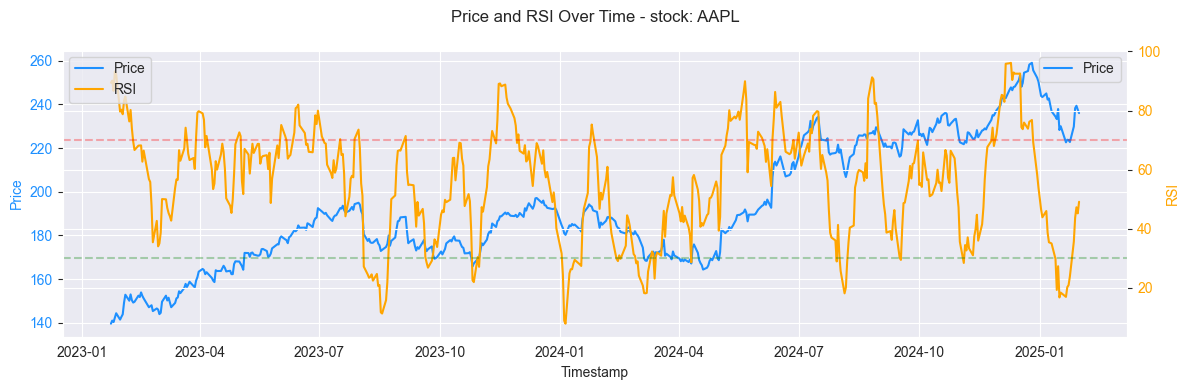

[*********************100%***********************]  1 of 1 completed


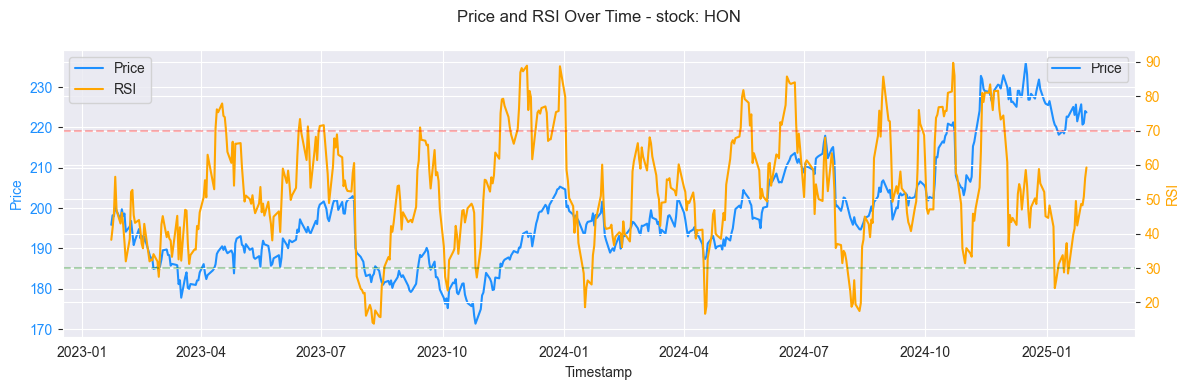

In [30]:
import numpy as np 

start = '2023-01-01'
end = '2025-02-01'
stocks:list = ['AAPL','HON']

for stock in stocks:
    stock_data = download_data(stock, start, end)
    #print(stock_data)

    stock_data['return'] = np.log(stock_data['Price'] / stock_data['Price'].shift(1))
    stock_data['move'] = stock_data['Price'] - stock_data['Price'].shift(1)
    stock_data['up'] = np.where(stock_data['move'] > 0, stock_data['move'], 0)
    stock_data['down'] = np.where(stock_data['move'] < 0, stock_data['move'], 0)

    # RS
    stock_data['average_gain'] = stock_data['up'].abs().rolling(14).mean()
    stock_data['average_loss'] = stock_data['down'].abs().rolling(14).mean()

    RS = stock_data['average_gain'] / stock_data['average_loss']

    stock_data['rsi'] = 100.0 - (100.0 / (1.0 + RS))

    stock_data.dropna(inplace=True)

    stock_data.tail()



    # Set the style
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 4))

    # Create the primary axis for Price
    ax1 = plt.gca()
    ax2 = ax1.twinx()  # Create a secondary axis

    # Plot Price on left axis
    sns.lineplot(data=stock_data, x='Timestamp', y='Price', ax=ax1, color='dodgerblue', label='Price')
    ax1.set_ylabel('Price', color='dodgerblue')
    ax1.tick_params(axis='y', labelcolor='dodgerblue')

    # Plot RSI on right axis
    sns.lineplot(data=stock_data, x='Timestamp', y='rsi', ax=ax2, color='orange', label='RSI')
    ax2.set_ylabel('RSI', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Add RSI threshold lines
    ax2.axhline(y=70, color='red', linestyle='--', alpha=0.3)
    ax2.axhline(y=30, color='green', linestyle='--', alpha=0.3)

    # Fix the legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Set title and adjust layout
    plt.title(f'Price and RSI Over Time - stock: {stock}', pad=20)
    plt.tight_layout()

    plt.show()




### Returns
- In finance, return is a profit on a given investment.
- The loss can be defined as negative return.
- Usually we convert each return into a return over a period of time of a standard length to be able to compare different return of different investments. 




<center> 


![alt text](assets/return1.png)





 This is how we can calculate daily returns of a given S(t) stock prices
</center>


</b>


### Logarithmic returns

<center>

#### $ r_t = \log(\frac{S(t+1)}{S(t)}) $




<b>let's calcualte the return for the next n periods:</b>



$ \frac{S(t)}{S(t-n)} = \frac{S(t)}{S(t-1)} \times \frac{S(t-1)}{S(t-2)} \times ... \times \frac{S(t-n+1)}{S(t-n)} \\
(1+R_t) \times (1+R_{t-1}) \times ... \times (1+R_{t-n+1}) $




<b>for logarithmic returns we have:</b>

$ \log[(1+R_t) \times (1+R_{t-1}) \times ... \times (1+R_{t-n+1})] \\
r_t + r_{t-1} + ... + r_{t-n+1} $

</center>



# Understanding Returns: Arithmetic vs Logarithmic

## Key Concepts

### Arithmetic Daily Returns
- For calculating returns over multiple periods, returns must be multiplied together
- **Important Note:** Even if individual daily returns are normally distributed, their product will NOT follow a normal distribution

$ R_{\text{period}} = (1+R_t) \times (1+R_{t-1}) \times ... \times (1+R_{t-n+1}) $


### Logarithmic Daily Returns
- Also requires multiplication of returns over periods
- However, due to logarithmic properties, we can simply add the returns
- **Key Advantage:** When the underlying returns are normally distributed, their sum remains normally distributed

$r_{\text{period}} = r_t + r_{t-1} + ... + r_{t-n+1}$


## Statistical Implications
1. **Arithmetic Returns:**
   - ❌ Product of normal variables → Non-normal distribution
   - Makes statistical analysis more complex
   - Less suitable for certain statistical methods

2. **Logarithmic Returns:**
   - ✅ Sum of normal variables → Normal distribution
   - Preserves normality properties
   - Better suited for statistical analysis and modeling
   - More commonly used in financial research and risk modeling

This property of logarithmic returns (maintaining normality under addition) is one of the main reasons why they are often preferred in financial analysis and modeling.



#### Log Daily Returns

Normalizes the dataset distribution
Makes statistical analysis more reliable


#### Differencing Operator

Removes trends from time series
Creates stationary data for better analysis



Simple, yet essential transformations for working with financial time series.

In [35]:
# Strategy implementation
import yfinance as yf 
import pandas as pd


class MovingAverageRSIStrategy:

    def __init__(self, capital, stock, start, end, short_period, long_period, rsi_upper_bound, rsi_lower_bound, sell_in_last_row):
        self.data = None
        self.is_long = False
        self.short_period = short_period
        self.long_period = long_period
        self.capital = capital
        self.equity = [capital] # pss, Equity is shares/stocks of a company, also is used for companies worth measurement (Equity = Assets - Liabilities)
        self.rsi_upper_bound = rsi_upper_bound
        self.rsi_lower_bound = rsi_lower_bound
        self.sell_in_last_row = sell_in_last_row


        self.stock = stock 
        self.start = start
        self.end = end
        self.trading_dates = []


    
    def download_data(self) -> pd.DataFrame:
        # Download data using yfinance
        ticker = yf.download(self.stock, self.start, self.end)
        print(f'start = {self.start}')
        
        # Create a dictionary with the required data
        data = {
            'Price': [item[0] for item in ticker['Close'].values],  # Use the 'Close' column for prices
            'Timestamp': ticker.index  # Use the index (dates) as the timestamp
        }
        # Convert the dictionary to a DataFrame
        res_df = pd.DataFrame(data)
        
        # Set the 'Timestamp' column as the index
        res_df.set_index('Timestamp', inplace=True)

        self.data = res_df
        
        return
    

    def construct_signals(self):
        # Calculate short and long moving averages
        self.data['short_ma'] = self.data['Price'].ewm(span=self.short_period).mean()
        self.data['long_ma'] = self.data['Price'].ewm(span=self.long_period).mean()
        
        # Calculate price movement
        self.data['move'] = self.data['Price'] - self.data['Price'].shift(1)
        
        # Separate up and down moves
        self.data['up'] = np.where(self.data['move'] > 0, self.data['move'], 0)
        self.data['down'] = np.where(self.data['move'] < 0, self.data['move'], 0)
        
        # Calculate average gain and loss
        self.data['average_gain'] = self.data['up'].abs().rolling(14).mean()
        self.data['average_loss'] = self.data['down'].abs().rolling(14).mean()
        
        # Calculate relative strength
        relative_strength = self.data['average_gain'] / self.data['average_loss']
        
        # Calculate RSI
        self.data['rsi'] = 100.0 - (100.0 / (1.0 + relative_strength))
        
        # Remove NaN values
        self.data = self.data.dropna()


    def plot_signals(self, plot_trading_dates=False):
        sns.set_style('darkgrid')
        sns.set_palette('tab10')

        # Create figure and primary axis
        fig, ax1 = plt.subplots(figsize=(16, 4))

        # Create secondary axis
        ax2 = ax1.twinx()

        # Plot price and MAs on primary axis
        sns.lineplot(data=self.data, x='Timestamp', y='Price', label='stock price', ax=ax1)
        sns.lineplot(data=self.data, x='Timestamp', y='short_ma', label=f'short_ma: {self.short_period}', ax=ax1)
        sns.lineplot(data=self.data, x='Timestamp', y='long_ma', label=f'long_ma: {self.long_period}', ax=ax1)

        # Plot RSI on secondary axis
        sns.lineplot(data=self.data, x='Timestamp', y='rsi', label='RSI', color='purple', ax=ax2)

        # Add RSI threshold lines
        ax2.axhline(y=self.rsi_upper_bound, color='red', linestyle='--', alpha=0.3)
        ax2.axhline(y=self.rsi_lower_bound, color='green', linestyle='--', alpha=0.3)

        # Set RSI axis limits and label
        ax2.set_ylim(0, 100)
        ax2.set_ylabel('RSI', color='purple')
        ax2.tick_params(axis='y', labelcolor='purple')

        if plot_trading_dates:
            y_min, y_max = ax1.get_ylim()
            text_y_position = y_max + (y_max - y_min) * -0.1

            # Process trades by type
            buy_dates = [trade['date'] for trade in self.trading_dates if trade['type'] == 'BUY']
            sell_dates = [trade['date'] for trade in self.trading_dates if trade['type'] == 'SELL']

            # Plot buy signals
            for date in buy_dates:
                ax1.axvline(x=date, color='green', alpha=0.5, linestyle='--', 
                            label='Buy' if date == buy_dates[0] else None)
                ax1.text(date, text_y_position, 'BUY', rotation=90, 
                    color='green', alpha=0.8, ha='left', va='bottom')

            # Plot sell signals
            for date in sell_dates:
                ax1.axvline(x=date, color='red', alpha=0.5, linestyle='--',
                            label='Sell' if len(sell_dates) > 0 and date == sell_dates[0] else None)
                ax1.text(date, text_y_position, 'SELL', rotation=90,
                            color='red', alpha=0.8, ha='left', va='bottom')

        # Combine legends from both axes
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

        plt.title(f'Moving Average Crossover Trading Strategy - Stock: {self.stock}')
        plt.tight_layout()
        plt.show()
        return

    
    def plot_equity(self):
        """
        Plot the equity curve and display trading performance metrics.
        
        Returns:
            None: Displays a plot and prints performance statistics
        """
        initial_equity = float(self.equity[0])
        final_equity = float(self.equity[-1])
        
        # Calculate profit percentage
        profit_percentage = ((final_equity - initial_equity) / initial_equity) * 100
        
        # Format output with f-strings for better readability
        print(f"Profit of the trading strategy: {profit_percentage:.2f}%")
        print(f"Actual capital: ${final_equity:.2f}")
        
        # Create figure with specified dimensions
        plt.figure(figsize=(12, 4))
        sns.lineplot(self.equity, label='stock price', color='green')
        sns.scatterplot(self.equity, label='stock price', color='green')
        plt.axhline(y=self.capital, label=f'initial capital: {self.capital}', alpha=0.7, color='gray', linestyle='--')
        plt.legend()
        plt.show()
        return 
    

    def simulate(self):
        # we considere all the trading days and decide to wheter open a long position or not
        price_when_buy = 0
        total_rows = len(self.data)

        for i, (index, row) in enumerate(self.data.iterrows()):
            trading_dict = {}
            is_last_row = (i == total_rows - 1)

            # close the long position we have opened
            if (row['short_ma'] < row['long_ma'] and self.is_long and row['rsi'] > self.rsi_upper_bound) or (is_last_row and self.is_long and self.sell_in_last_row):
                # death cross 
                self.equity.append(self.capital * row.Price / price_when_buy)
                self.is_long = False
                trading_dict['type'] = 'SELL'
                trading_dict['date'] = index
                self.trading_dates.append(trading_dict)
                #print('SELL')

            elif row['short_ma'] > row['long_ma'] and not self.is_long and row['rsi'] < self.rsi_lower_bound:
                # golden cross
                # OPEN LONG POSITION
                price_when_buy = row['Price']
                self.is_long = True
                trading_dict['type'] = 'BUY'
                trading_dict['date'] = index
                self.trading_dates.append(trading_dict)
                #print('BUY')

    def show_stats(self):
        # Calculate strategy profit percentage
        initial_equity = float(self.equity[0])
        final_equity = float(self.equity[-1])
        profit_percentage = ((final_equity - initial_equity) / initial_equity) * 100
        
        # Calculate returns and annualized Sharpe ratio
        returns = (self.data['Price'] - self.data['Price'].shift(1)) / self.data['Price'].shift(1)
        sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)  # 252 trading days in a year
        
        # Print results
        print(f"Profit of the trading strategy: {profit_percentage:.2f}%")
        print(f"Actual capital: ${final_equity:.2f}")
        print(f"Sharpe ratio: {sharpe_ratio:.2f}")



            

[*********************100%***********************]  1 of 1 completed

Stock = HON
start = 2020-01-01 00:00:00
Profit of the trading strategy: -0.29%
Actual capital: $99.71


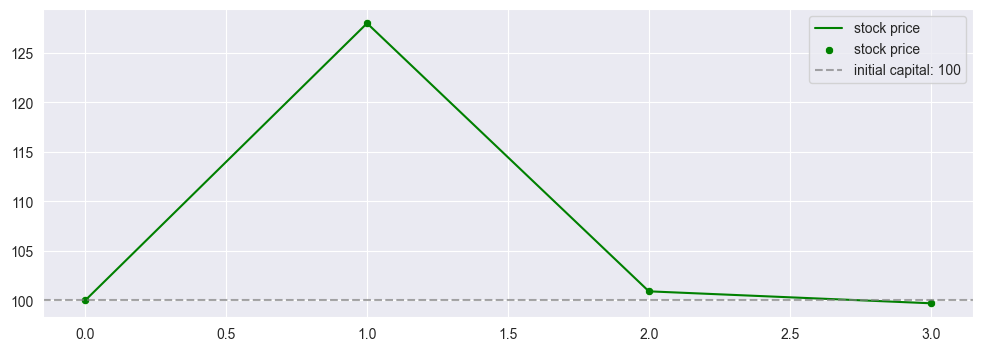

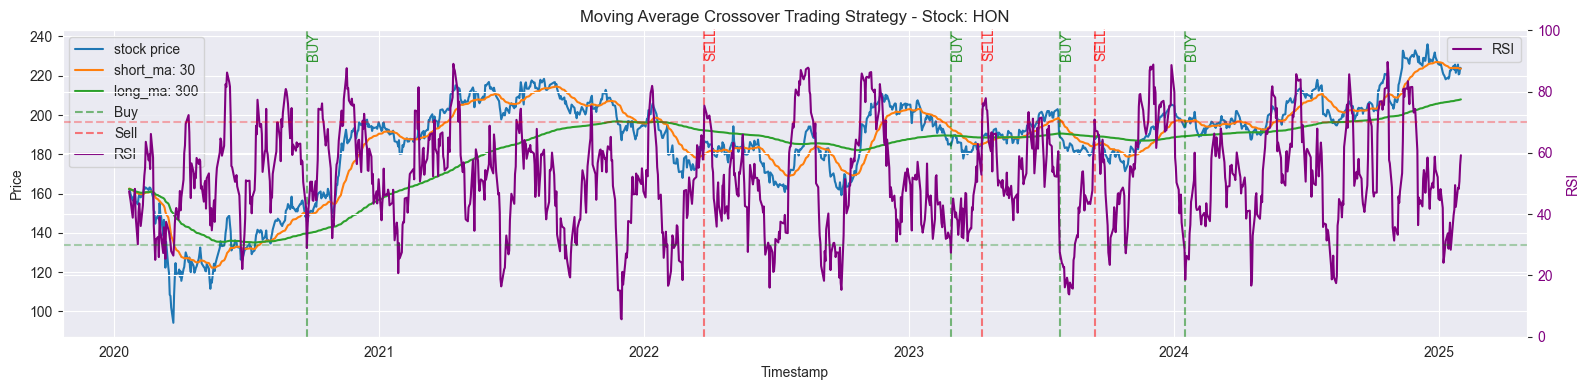

[*********************100%***********************]  1 of 1 completed

Profit of the trading strategy: -0.29%
Actual capital: $99.71
Sharpe ratio: 0.37
[{'type': 'BUY', 'date': Timestamp('2020-09-23 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-03-25 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-02-28 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-04-12 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-07-28 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-09-14 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2024-01-16 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = AAPL
start = 2020-01-01 00:00:00
Profit of the trading strategy: 0.62%
Actual capital: $100.62


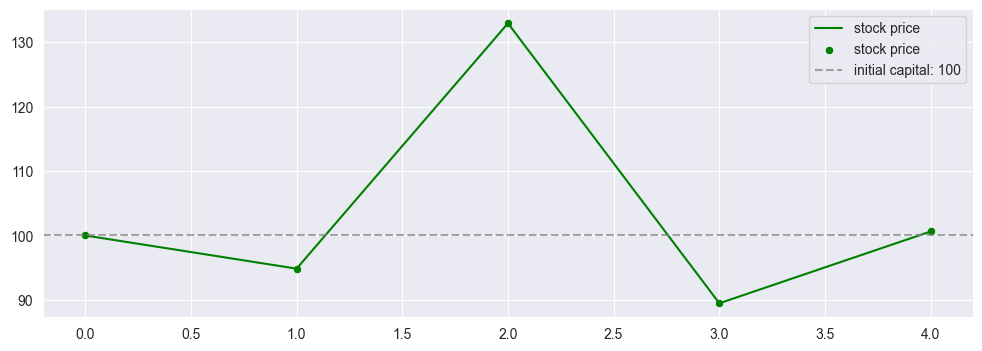

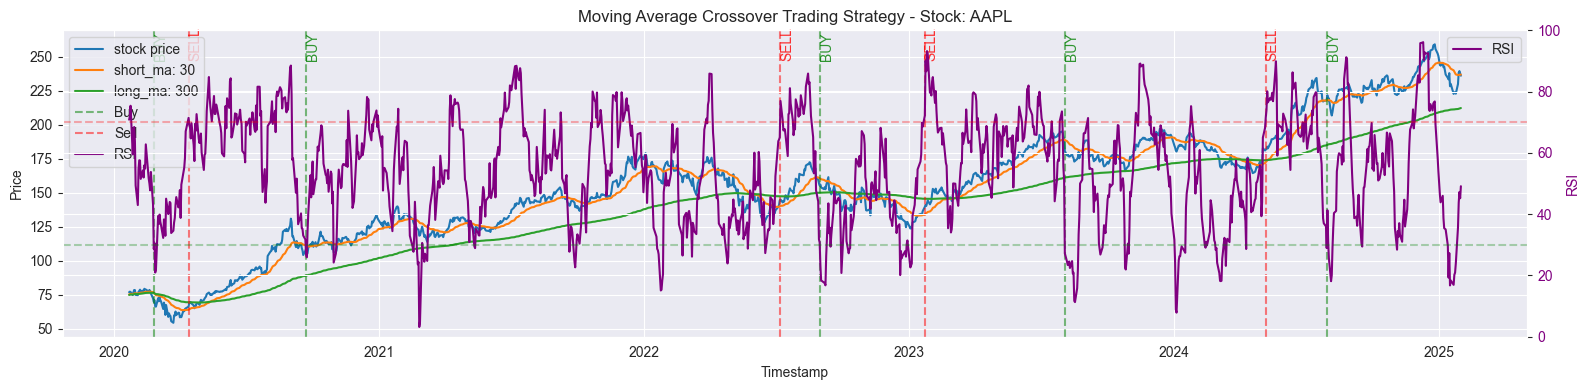

[*********************100%***********************]  1 of 1 completed

Profit of the trading strategy: 0.62%
Actual capital: $100.62
Sharpe ratio: 0.86
[{'type': 'BUY', 'date': Timestamp('2020-02-25 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-04-13 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-09-22 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-07-08 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-09-01 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-01-23 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-08-04 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2024-05-07 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2024-07-30 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = NVDA
start = 2020-01-01 00:00:00
Profit of the trading strategy: 44.23%
Actual capital: $144.23


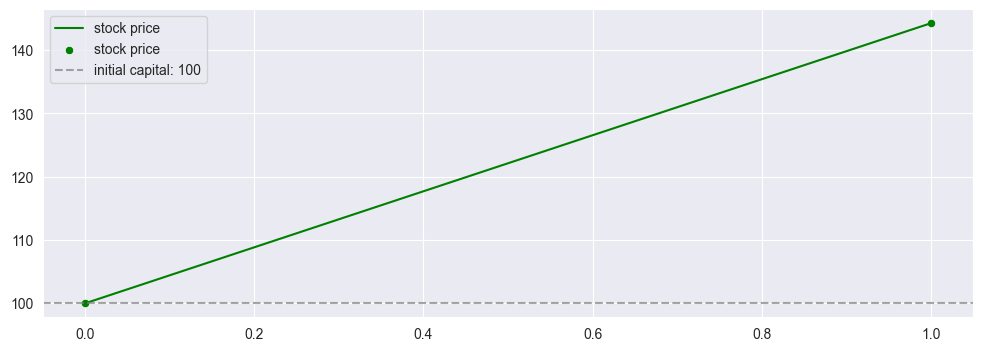

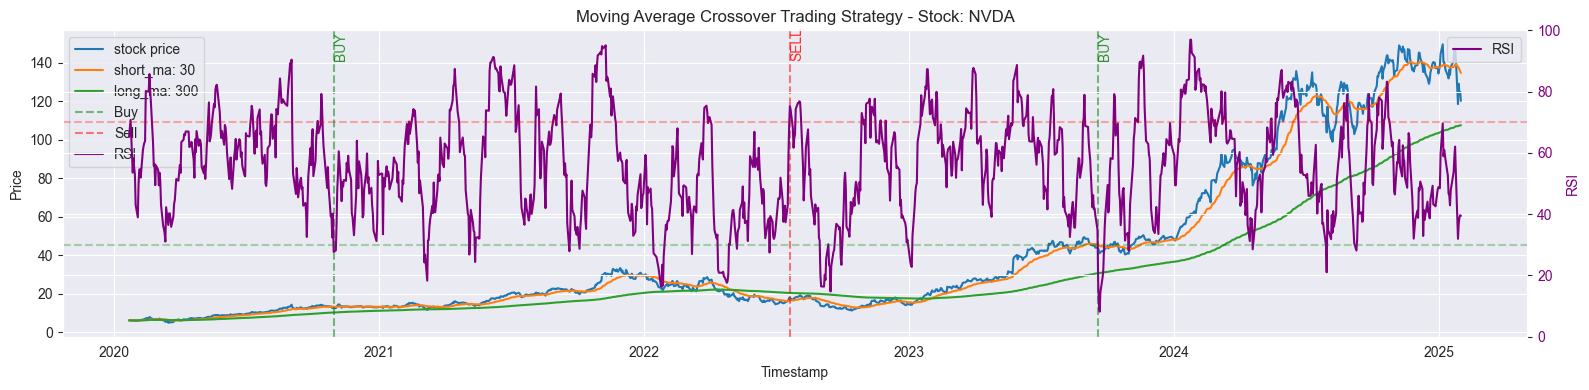

[*********************100%***********************]  1 of 1 completed

Profit of the trading strategy: 44.23%
Actual capital: $144.23
Sharpe ratio: 1.35
[{'type': 'BUY', 'date': Timestamp('2020-10-30 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-07-21 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-09-19 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = TSLA
start = 2020-01-01 00:00:00
Profit of the trading strategy: -4.13%
Actual capital: $95.87


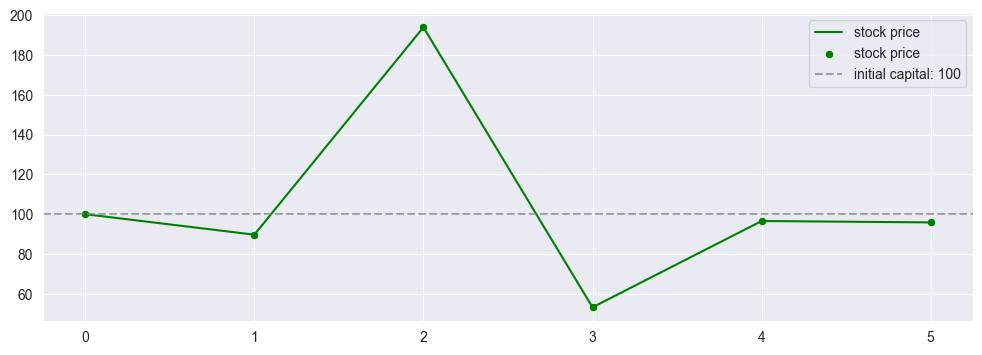

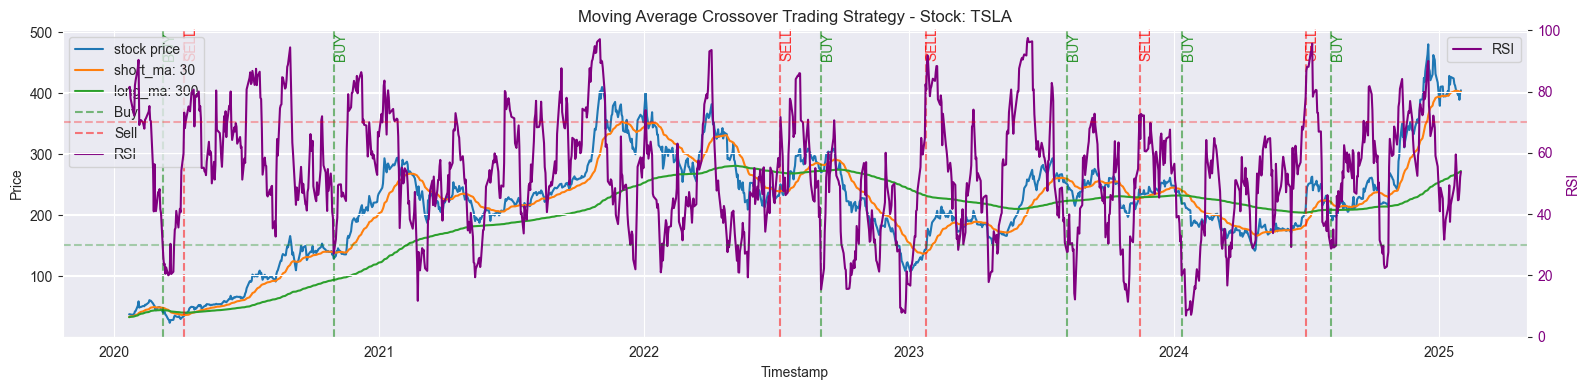

[*********************100%***********************]  1 of 1 completed

Profit of the trading strategy: -4.13%
Actual capital: $95.87
Sharpe ratio: 1.04
[{'type': 'BUY', 'date': Timestamp('2020-03-09 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-04-07 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-10-30 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-07-08 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-09-02 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-01-24 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-08-07 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-11-15 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2024-01-12 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2024-07-01 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2024-08-05 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = BTC-USD
start = 2020-01-01 00:00:00
Profit of the tra

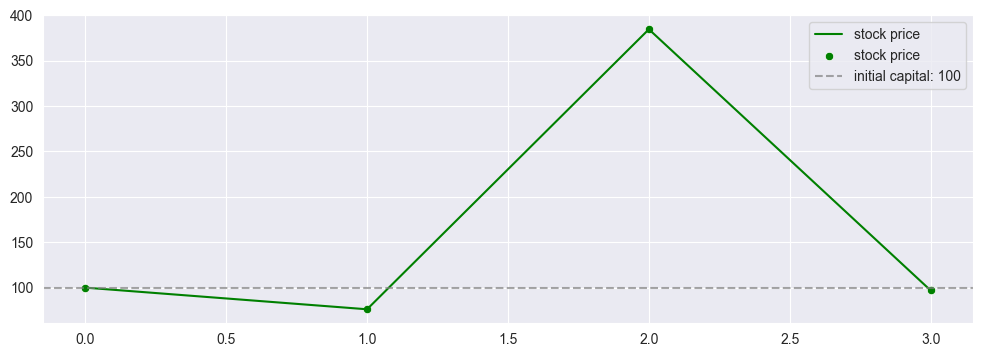

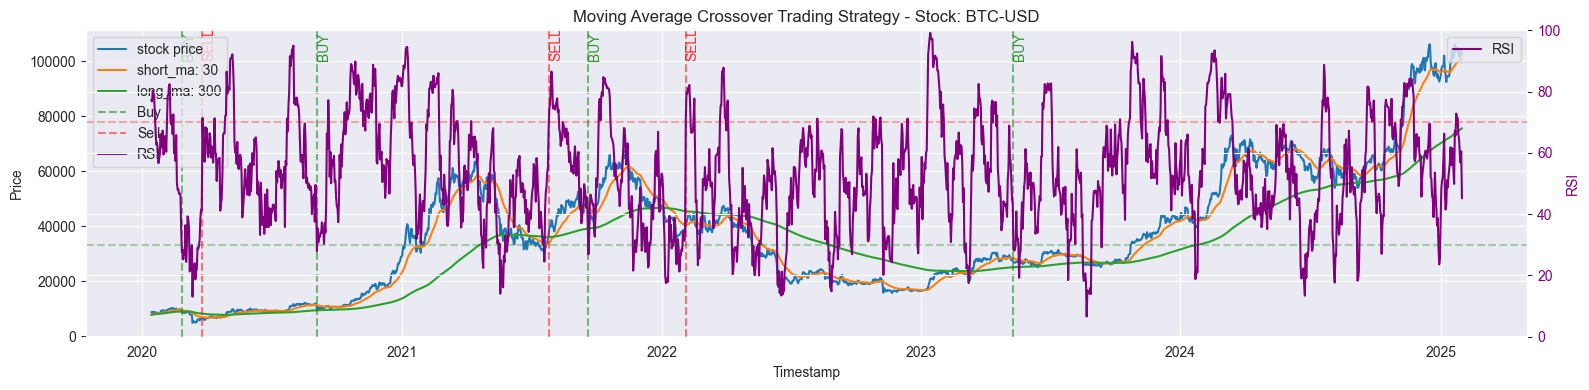

[*********************100%***********************]  1 of 1 completed

Profit of the trading strategy: -3.13%
Actual capital: $96.87
Sharpe ratio: 0.90
[{'type': 'BUY', 'date': Timestamp('2020-02-26 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-03-26 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-09-03 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2021-07-27 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2021-09-20 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-02-04 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-05-11 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = IBM
start = 2020-01-01 00:00:00
Profit of the trading strategy: -0.87%
Actual capital: $99.13


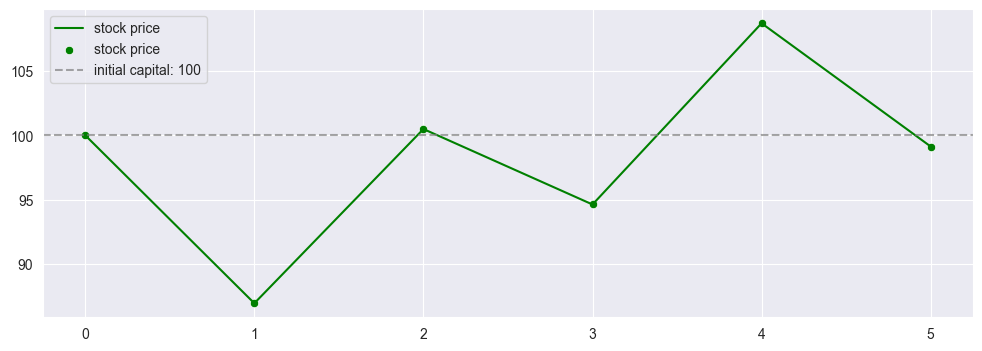

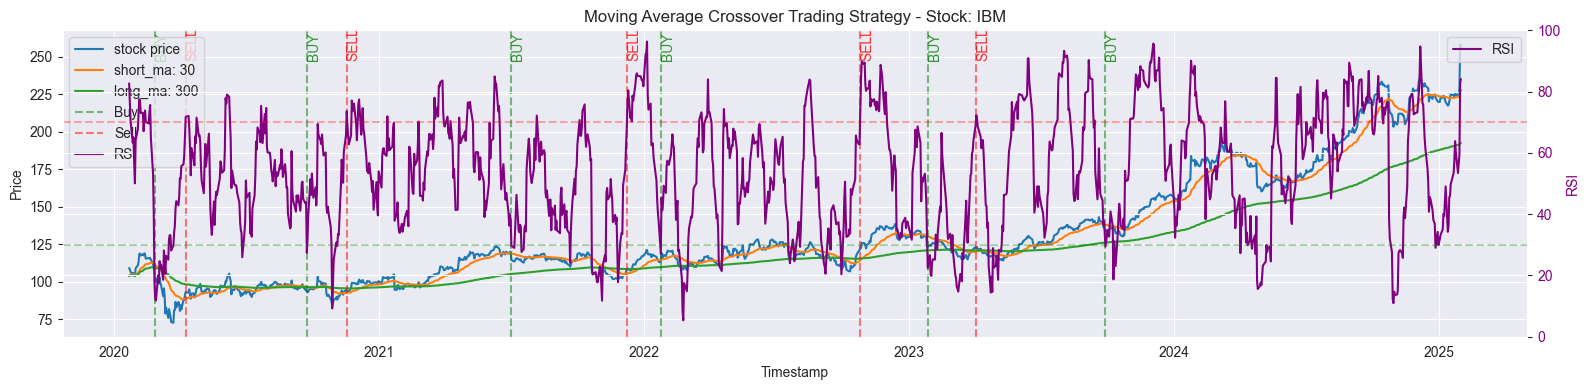

Profit of the trading strategy: -0.87%
Actual capital: $99.13
Sharpe ratio: 0.76
[{'type': 'BUY', 'date': Timestamp('2020-02-26 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-04-09 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-09-23 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-11-17 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2021-07-02 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2021-12-09 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-01-24 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-10-26 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-01-27 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-04-04 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-09-29 00:00:00')}]
********************************************************************************************************************************************************************************************************




In [36]:
if __name__ == '__main__':

    import datetime

    stock_list:list = ['HON', 'AAPL', 'NVDA', 'TSLA', 'BTC-USD', 'IBM']
    short_period:int = 30 # days
    long_period:int = 300 # days 
    rsi_upper_bound:int = 70
    rsi_lower_bound:int = 30
    start_date = datetime.datetime(2020, 1, 1)
    end_date = datetime.datetime(2025, 2, 1)

    for stock in stock_list:
        print(f'Stock = {stock}')
        
        model = MovingAverageRSIStrategy(capital=100, stock=stock, start=start_date, end=end_date, short_period=30,long_period=300, 
                                         rsi_upper_bound=rsi_upper_bound, rsi_lower_bound=rsi_lower_bound, sell_in_last_row=False)

        model.download_data()
        model.construct_signals()
        model.simulate()
        model.plot_equity()
        model.plot_signals(plot_trading_dates=True)
        model.show_stats()


        print(model.trading_dates)
        print('*'*200)
        print("\n")


## Sharpe Ratio

The Sharpe Ratio is a cornerstone metric in quantitative finance, developed by Nobel laureate William Sharpe. It's essentially the "bang for your buck" measure of investing - how much extra return you're getting for the additional risk you're taking.

### Technical Definition
The Sharpe Ratio measures the risk-adjusted return of an investment by comparing its excess returns (returns above the risk-free rate) to its standard deviation (volatility). A ratio greater than 1 is considered good, as it indicates better risk-adjusted returns.

$ S(x) = \frac{r_x - R_f}{\sigma(x)} $


Where:
- rx = Average return of investment
- Rf = Risk-free rate (typically Treasury bill rate)
- σ(x) = Standard deviation of investment returns (volatility)

### Practical Interpretation
Think of it like a "safety-adjusted speed" measure for your investments:
- Regular returns are like a car's speed
- Volatility is like the dangerous road conditions
- Sharpe Ratio tells you if you're getting enough extra speed to justify driving on a riskier road

For example:
- Investment A: 15% return with 10% volatility
- Investment B: 12% return with 5% volatility
- Risk-free rate: 3%
- Sharpe Ratio A: (15-3)/10 = 1.2
- Sharpe Ratio B: (12-3)/5 = 1.8
Despite lower returns, Investment B has better risk-adjusted performance



"For example, a Sharpe ratio of 1.35 means that for every unit of risk (volatility) you're taking, you're getting 1.35 units of excess return. That's like getting 35% more 'bang for your buck' than what's considered the minimum for a good investment."

Compare it to benchmarks:

- < 1: Not great risk/reward
- 1-2: Good risk/reward
- 2: Excellent risk/reward

